# Full arXiv data summary
### Input data can be found:

(Unzip the full_data_by_category.json.bz2 in `core/resources`)

https://drive.google.com/drive/u/0/folders/1mXg_ie1h0dwM1epOJyP779kbPi7JphtQ


_for original data set see:_ https://www.kaggle.com/Cornell-University/arxiv

In [8]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)
import pandas as pd

In [3]:
import string
from core.util.basic_io import *
from core.util.plot_util import *

In [4]:
file_name = "full_data_by_category.json"
full_path = os.path.join(parent_dr, "core", "resources", file_name)
data = read_json_to_dict(full_path)

In [5]:
print("Number of categories: ", len(data))

Number of categories:  176


In [6]:
cat_counts = []
for cat, articles in data.items():
    cat_counts.append([cat, len(articles)])

In [9]:
# for cateories see https://arxiv.org/category_taxonomy
counts_df = pd.DataFrame(cat_counts, columns=['category', 'n'])
counts_df.sort_values(by=['category'], inplace=True)
counts_df.head()

,category,n
156,acc-phys,49
157,adap-org,584
166,alg-geom,1423
169,ao-sci,17
9,astro-ph,105380


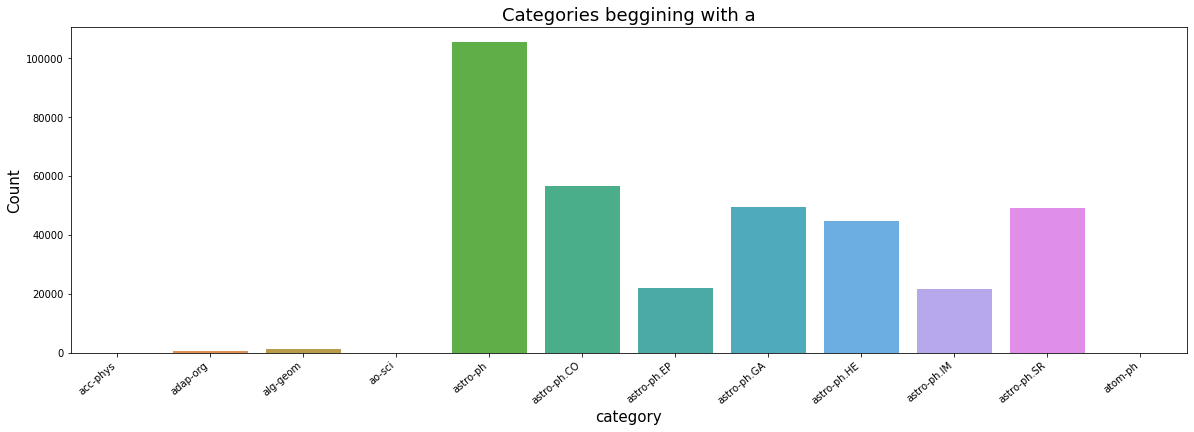

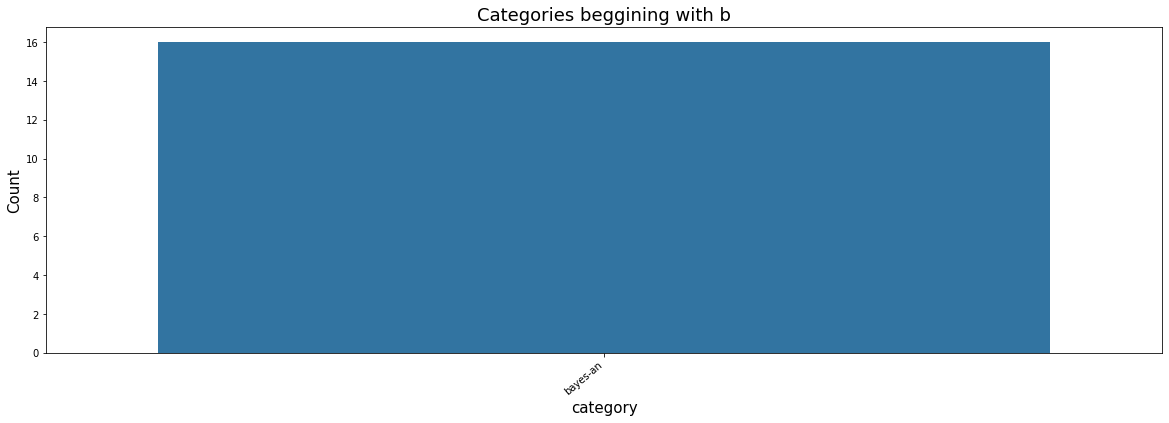

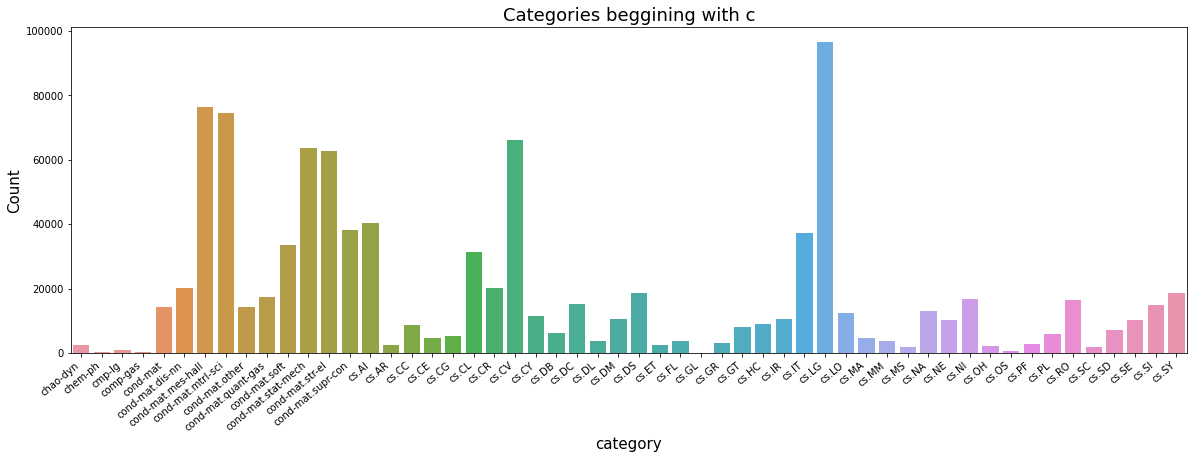

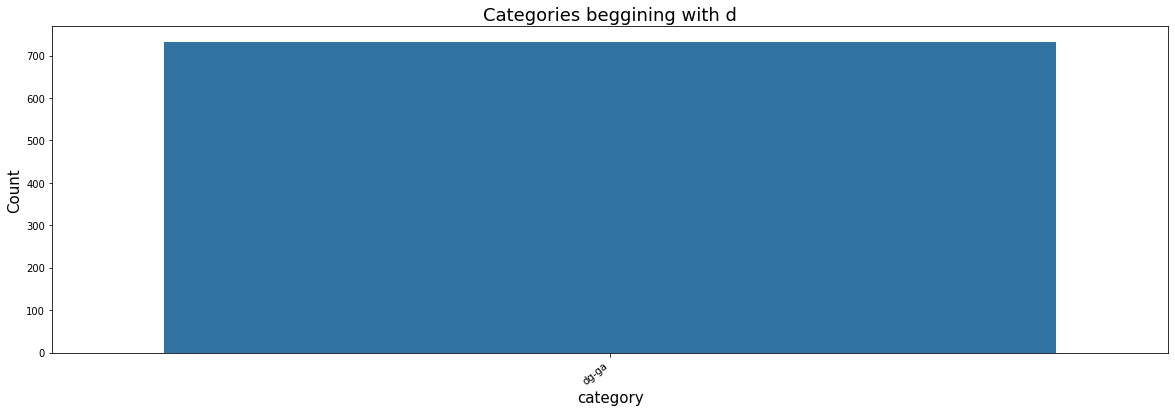

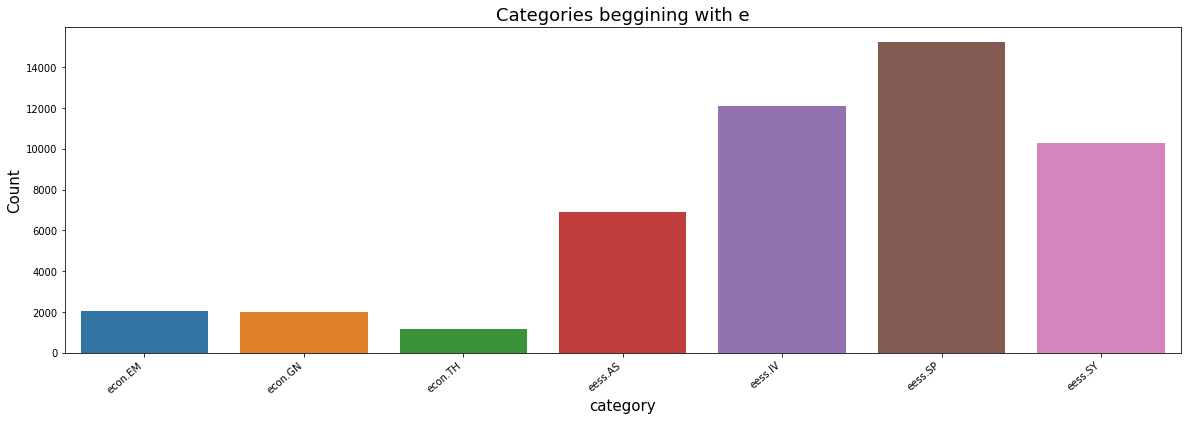

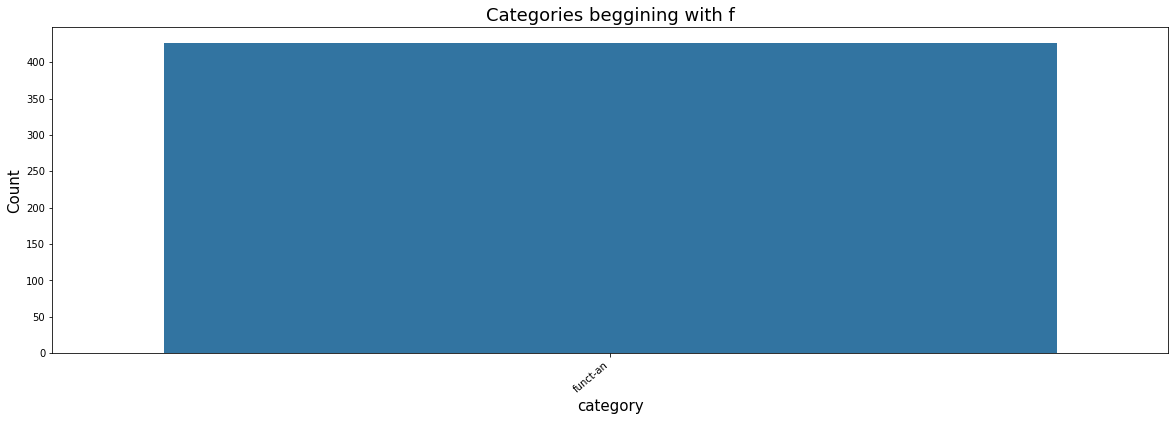

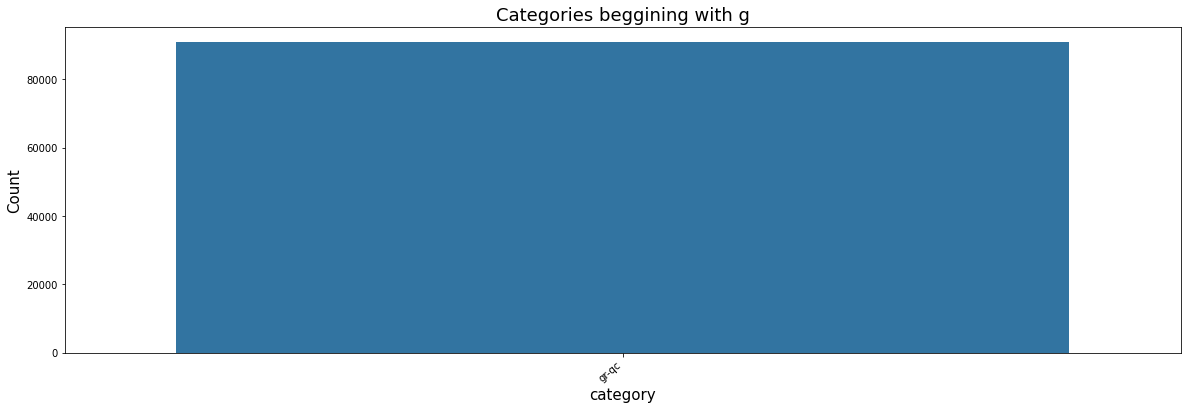

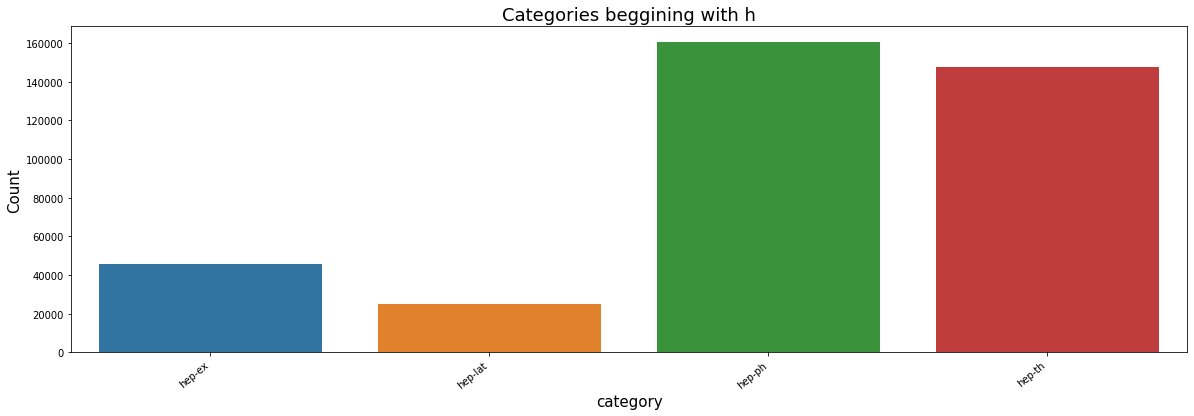

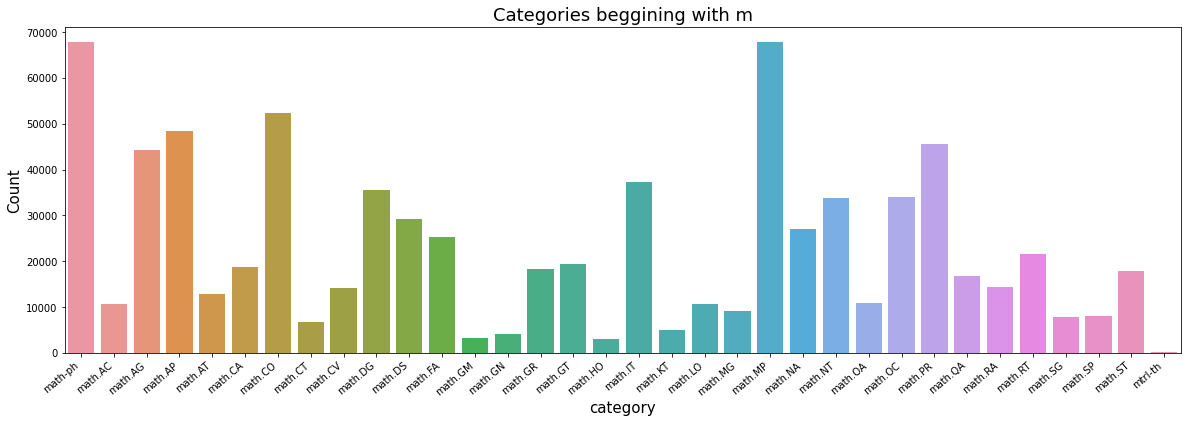

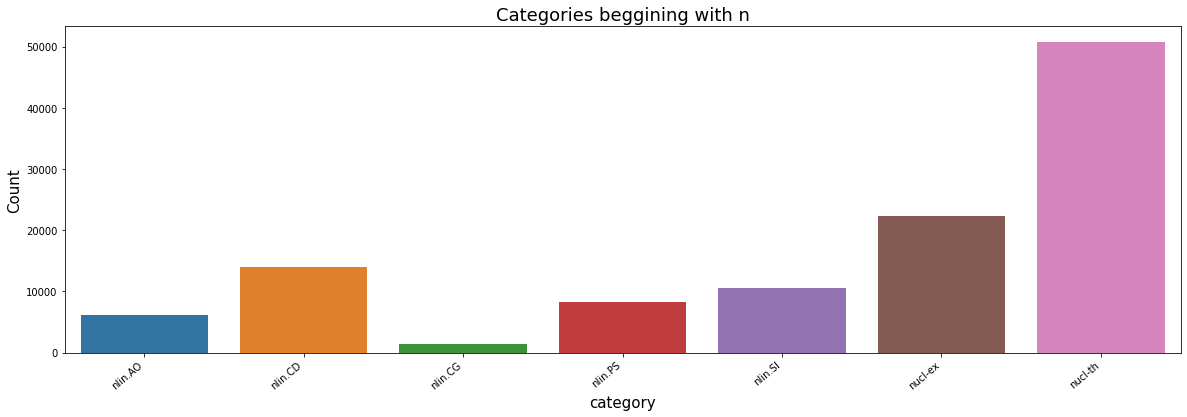

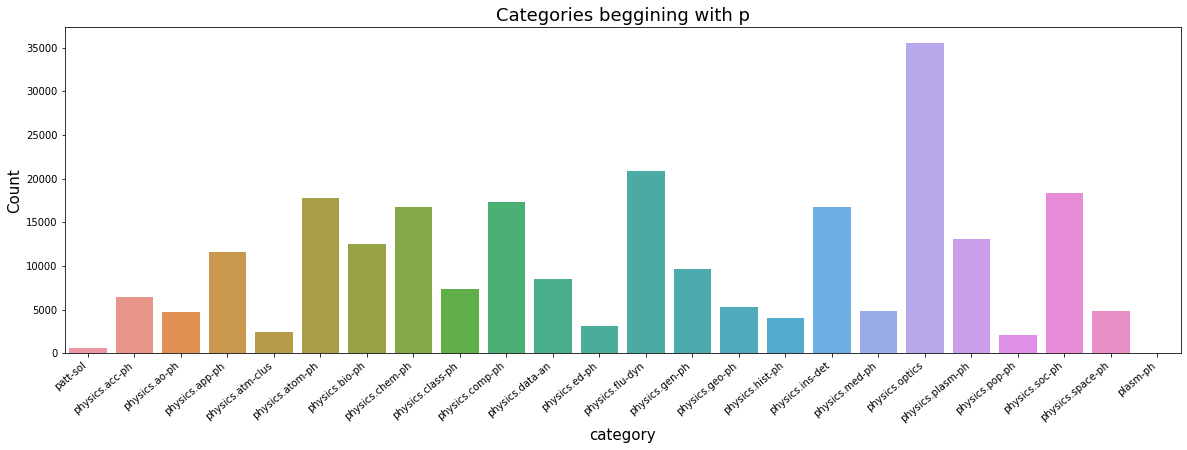

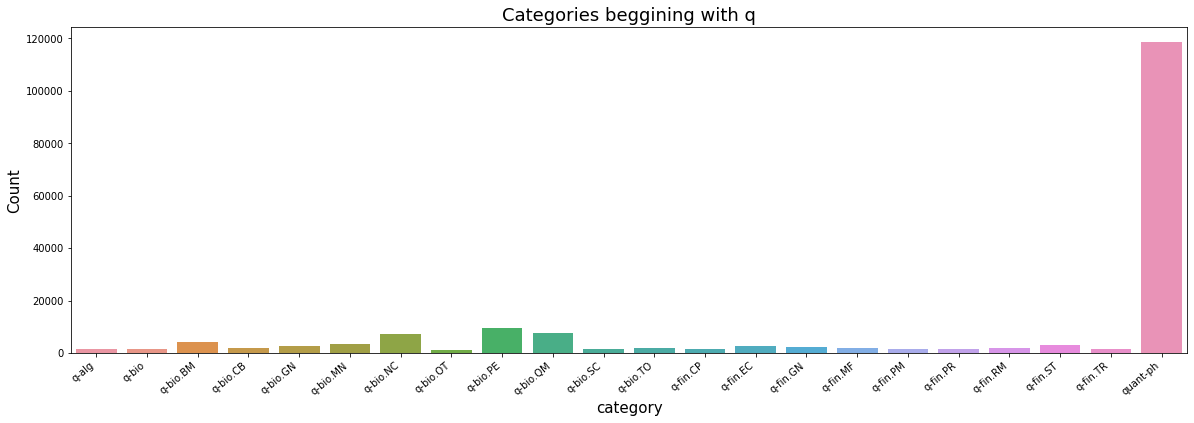

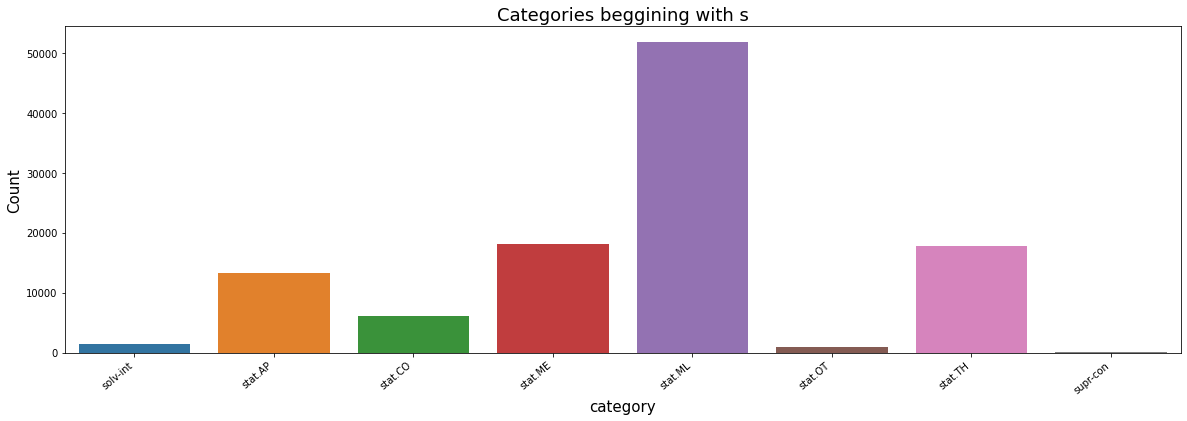

In [10]:
for letter in string.ascii_lowercase:
    subset = counts_df.loc[counts_df['category'].str.startswith(letter)]
    if len(subset) > 0:
        create_barplot(subset, 'category', 'n', f"Categories beggining with {letter}")